In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVIES']='1'

E: 5000.0
dim: 3
dt_quality: 1.0
dtype: float32
dynamic_box: False
gravity: (0.0, -1.0, 0.0)
grid_size: (1.0, 1.0, 1.0)
ground_friction: 10.0
ground_height: 3.0
max_steps: 1024
muscle_stiffness: 150.0
n_particles: 20000
nu: 0.2
particle_contact: False
quality: 1.0
use_actuation: False
yield_stress: 100.0
[Taichi] version 0.8.11, llvm 10.0.0, commit 9d0973e5, linux, python 3.8.12
[I 02/12/22 18:11:08.385 80127] [shell.py:_shell_pop_print@33] Graphical python shell detected, using wrapped sys.stdout
[Taichi] Starting on arch=cuda
Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
{'width': (0.2, 0.2, 0.2), 'init_pos': (0.5, 0.1, 0.5), 'n_particles': 3000, 'color': 9868800}
Building primitive
action:
  dim: 6
  scale: (0.01, 0.01, 0.01, 0.01, 0.01, 0.01)
color: (0.8, 0.8, 0.8)
friction: 5.0
init_pos: (0.25, 0.1, 0.5)
init_rot: (1.0, 0.0, 0.0, 0.0)
lower_bound: (-1.0, -1.0,

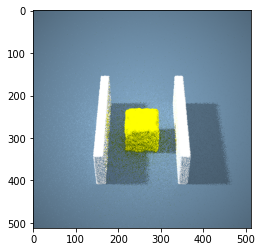

In [3]:
from diffrl.env import DifferentiablePhysicsEnv

plb_env = DifferentiablePhysicsEnv(cfg_path='configs/plb3d.yml', sim_cfg=dict(ground_friction=10., dtype='float32'), use_taichi=True)
plb_env.render('plt')

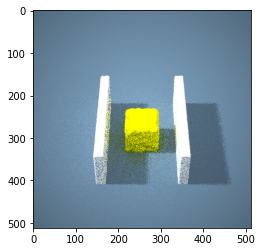

In [4]:
plb_env.render('plt')

In [5]:
sdf_volume = plb_env.renderer.sdf.to_numpy()
color_volume = plb_env.renderer.color_vec.to_numpy()
bbox = plb_env.renderer.bbox.to_numpy()
import pickle
with open('render_checkpoint.pkl', 'wb') as f:
    print(sdf_volume.shape, color_volume.shape,bbox.shape)
    pickle.dump([sdf_volume, color_volume, bbox], f)

(168, 168, 168) (168, 168, 168, 3) (2, 3)


3000
[4.0001473e-01 1.4489928e-05 4.0006131e-01]
[0.5999956 0.1999928 0.5999913]


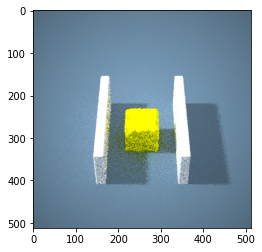

[[ 0.36 -0.04  0.36]
 [ 1.48  1.08  1.48]]


In [6]:
print(plb_env.renderer.num_particles[None])
print(plb_env.renderer.particle_x.to_numpy()[:3000].min(axis=0))
print(plb_env.renderer.particle_x.to_numpy().max(axis=0))
plb_env.render('plt')
print(bbox)

In [7]:
pickle.dump(plb_env.get_state()['particles'][0], open('p.pkl', 'wb'))

In [8]:
print(plb_env.renderer.sdf_threshold)

0.4144


In [9]:
print(plb_env.renderer.camera_mat)
print(plb_env.renderer.camera_pos)

[[ 1.          0.          0.        ]
 [ 0.          0.70710677 -0.70710677]
 [-0.          0.70710677  0.70710677]]
(0.5, 1.2, 4.0)


In [ ]:
from mpm.cuda_env import CudaEnv
import os
cu_env = CudaEnv(PRIMITIVES=[], SIMULATOR=dict(yield_stress=10000.)) #yield_stress=10000

In [12]:
from mpm.tester.tester import generate_state, assert_state, test_p2g, test_grid_op, test_g2p
import numpy as np

state = generate_state(20000)
state1 = generate_state(20000)


In [ ]:
# test_p2g(cu_env, plb_env, state)
test_grid_op(cu_env, plb_env, state, state1)
#test_p2g(cu_env, plb_env, state)
#test_g2p(cu_env, plb_env, state, state1)
